In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df1 = pd.read_csv('/content/applicant.csv')
df2 = pd.read_csv('/content/loan.csv')

In [186]:
df_final = df1.merge(df2,on='applicant_id',how='inner')
df_final.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [187]:
df_final.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [188]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [189]:
df_final['high_risk_applicant'].value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

In [190]:
num_cols = [col for col in df_final.columns if df_final[col].dtype!='object']

cat_cols = [col for col in df_final.columns if df_final[col].dtype=='object']

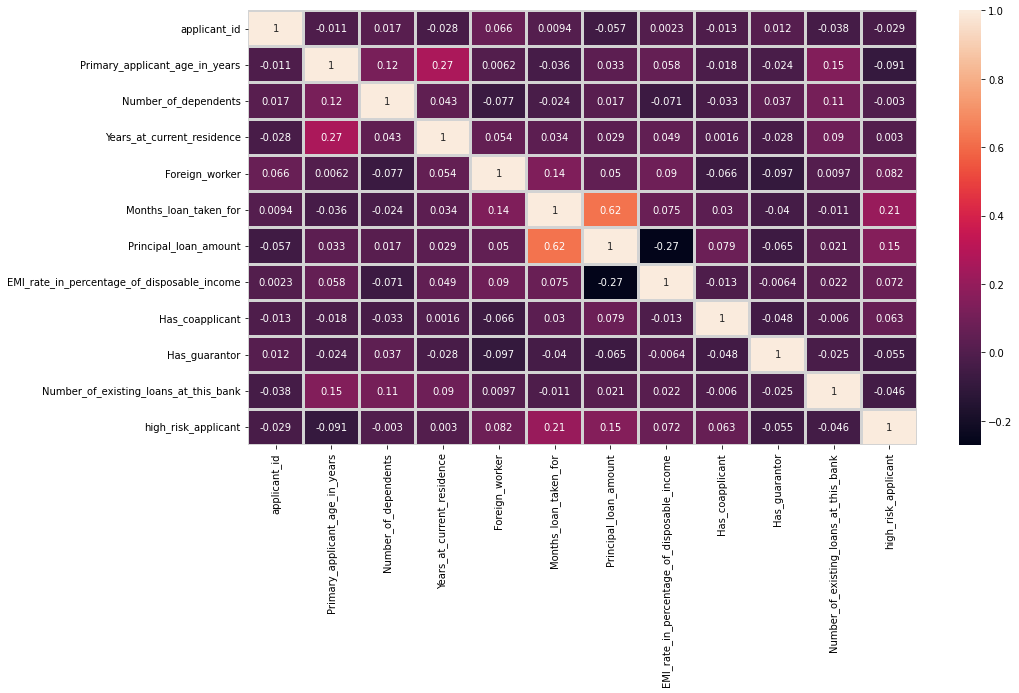

In [191]:
# correlated heatmap of data

plt.figure(figsize = (15, 8))


sns.heatmap(df_final.corr(),annot=True,linewidth=2,linecolor='lightgrey')
plt.show()

In [192]:
# let's check count of null values in whole df

df_final.isnull().sum().sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Months_loan_taken_for                                         0
Loan_history                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                   

In [193]:
# let's check count of null values in num_cols

df_final[num_cols].isnull().sum().sort_values(ascending=False)

applicant_id                                   0
Primary_applicant_age_in_years                 0
Number_of_dependents                           0
Years_at_current_residence                     0
Foreign_worker                                 0
Months_loan_taken_for                          0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
high_risk_applicant                            0
dtype: int64

In [194]:
# let's check count of null values in cat cols

df_final[cat_cols].isnull().sum().sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Gender                                                        0
Marital_status                                                0
Housing                                                       0
Employment_status                                             0
loan_application_id                                           0
Loan_history                                                  0
dtype: int64

In [195]:
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = df_final[feature].mode()[0]
    df_final[feature] = df_final[feature].fillna(mode)

In [196]:
# filling null valuesfor  cat_cols using mode imputation
for col in cat_cols:
  impute_mode(col)

In [197]:
# let's check count of null values in cat_cols again

df_final[cat_cols].isnull().sum().sort_values(ascending=False)

Gender                                                      0
Marital_status                                              0
Housing                                                     0
Employment_status                                           0
Has_been_employed_for_at_least                              0
Has_been_employed_for_at_most                               0
Telephone                                                   0
Savings_account_balance                                     0
Balance_in_existing_bank_account_(lower_limit_of_bucket)    0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
loan_application_id                                         0
Purpose                                                     0
Property                                                    0
Other_EMI_plans                                             0
Loan_history                                                0
dtype: int64

In [198]:
df_final[cat_cols].columns

Index(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Purpose', 'Property', 'Other_EMI_plans',
       'Loan_history'],
      dtype='object')

In [199]:
# downloading the data to view it in power Bi for visualization report
df_final.to_csv('loan_report.csv')

In [200]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[0:]:
    df_final[col] = le.fit_transform(df_final[col])

In [201]:
df_final.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,1,3,1,1,4,1,3,2,...,5,1169000,4,2,0,0,0,2,1,0
1,1203873,22,0,1,1,1,2,1,1,2,...,5,5951000,2,2,0,0,0,1,3,1
2,1432761,49,1,3,2,1,3,3,2,3,...,4,2096000,2,2,0,0,0,1,1,0
3,1207582,45,1,3,2,0,4,1,2,3,...,0,7882000,2,0,0,1,0,1,3,0
4,1674436,53,1,3,2,0,4,1,1,2,...,6,4870000,3,1,0,0,0,2,2,1


**Model Building**
1. Split the Data into Training and Testing Sets

In [202]:
X = df_final.drop('high_risk_applicant',axis=1)
y = df_final['high_risk_applicant']

Step 2: Create the labels set (y) from the 'high_risk_applicant column, and then create the features (X) DataFrame from the remaining columns.

Step 3: Split the data into training and testing datasets by using train_test_split.

In [203]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 1)

Logistic Regression Model with the Original Data

Step 4: Fit a logistic regression model by using the training data (X_train and y_train).

In [204]:
# Create the Logistic Regression model.
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

# Fit the model using training data.
lr_model = logistic_regression_model.fit(X_train, y_train)

Step 5: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.


In [205]:
# Make a prediction using the testing data.
y_pred = logistic_regression_model.predict(X_test)


Step 6: Evaluate the model’s performance by doing the following:

In [206]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
# Print the accuracy score of the model.
print('Training accuracy score :',accuracy_score(y_train,logistic_regression_model.predict(X_train)))


Training accuracy score : 0.7071428571428572


In [207]:
log_acc  = accuracy_score(y_test,y_pred)
print(f'Test Accuracy of Logistic regression {log_acc} \n')

print(f'Confusion Matrix :- \n{confusion_matrix(y_test,y_pred)}\n')
print(f'Classification Report :- \n{classification_report(y_test,y_pred)}')

Test Accuracy of Logistic regression 0.7066666666666667 

Confusion Matrix :- 
[[208   6]
 [ 82   4]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       214
           1       0.40      0.05      0.08        86

    accuracy                           0.71       300
   macro avg       0.56      0.51      0.45       300
weighted avg       0.63      0.71      0.61       300



**Random Forest Classifier**

In [208]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
rd_clf = RandomForestClassifier()

rd_clf.fit(X_train,y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc  = accuracy_score(y_test,rd_clf.predict(X_test))

print(f'Training Accuracy of Random Forest Classifier is {accuracy_score(y_train,rd_clf.predict(X_train))}')
print(f'Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n')

print(f'Confusion Matrix :- \n{confusion_matrix(y_test,rd_clf.predict(X_test))}\n')
print(f'Classification Report :- \n{classification_report(y_test,rd_clf.predict(X_test))}')

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.73 

Confusion Matrix :- 
[[201  13]
 [ 68  18]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       214
           1       0.58      0.21      0.31        86

    accuracy                           0.73       300
   macro avg       0.66      0.57      0.57       300
weighted avg       0.70      0.73      0.68       300



**Gradient Boosting Classifier**

In [209]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)
# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test,gb.predict(X_test))

print(f'Training Accuracy of GBC is {accuracy_score(y_train,gb.predict(X_train))}')
print(f'Test Accuracy of GBC is {gb_acc} \n')

print(f'Confusion Matrix :- \n{confusion_matrix(y_test,gb.predict(X_test))}\n')
print(f'Classification Report :- \n{classification_report(y_test,gb.predict(X_test))}')



Training Accuracy of GBC is 0.91
Test Accuracy of GBC is 0.7233333333333334 

Confusion Matrix :- 
[[192  22]
 [ 61  25]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       214
           1       0.53      0.29      0.38        86

    accuracy                           0.72       300
   macro avg       0.65      0.59      0.60       300
weighted avg       0.69      0.72      0.69       300



**Hyperparameter Tuning on Random Forest**

In [210]:
from sklearn.model_selection import GridSearchCV


In [234]:
#params=dict(n_estimators=[100,110,120],max_depth=[2,3,4])
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [235]:
rf1=GridSearchCV(rd_clf,param_grid=params,verbose=1)

In [236]:
%timeit
rf1.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [237]:
rf1.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [238]:
rf1.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200)

In [239]:
#Accuracy
rf1.score(X_test,y_test)

0.7266666666666667

In [240]:
y_pred1=rf1.predict(X_test)

In [241]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred1))

[[205   9]
 [ 73  13]]


In [242]:
print('classification report of RFC after tuning :\n',classification_report(y_test,y_pred1))

classification report of RFC after tuning :
               precision    recall  f1-score   support

           0       0.74      0.96      0.83       214
           1       0.59      0.15      0.24        86

    accuracy                           0.73       300
   macro avg       0.66      0.55      0.54       300
weighted avg       0.70      0.73      0.66       300



**The Conclusion from Model Building**

Therefore Random Forest Classifier is the best model for this prediction since it has an accuracy_score of 0.72.

Saving Model 

In [220]:
#saving it for local folder 
import pickle 
filename ='trained_model.sav'
pickle.dump(rf1,open(filename,'wb'))

loaded_model = pickle.load(open('trained_model.sav','rb'))

Putting data points in the model will either return 0 or 1

In [221]:
rf1.predict([[1469590,67,1,3,1,1,4,1,3,3,0,1,2,1,0,0,6,5,1169000,4,2,0,0,0,2,1]]) # 1st applicant

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [222]:
df_final.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,1,3,1,1,4,1,3,2,...,5,1169000,4,2,0,0,0,2,1,0
1,1203873,22,0,1,1,1,2,1,1,2,...,5,5951000,2,2,0,0,0,1,3,1
2,1432761,49,1,3,2,1,3,3,2,3,...,4,2096000,2,2,0,0,0,1,1,0
3,1207582,45,1,3,2,0,4,1,2,3,...,0,7882000,2,0,0,1,0,1,3,0
4,1674436,53,1,3,2,0,4,1,1,2,...,6,4870000,3,1,0,0,0,2,2,1


In [223]:
df_final.iloc[:,9:20] # just to view middle columns data 

,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income
0,2,0,1,1,0,0,0,6,5,1169000,4
1,2,0,1,1,0,1,1,48,5,5951000,2
2,3,0,1,1,0,0,2,12,4,2096000,2
3,3,0,1,1,0,0,3,42,0,7882000,2
4,2,0,1,1,0,0,4,24,6,4870000,3
...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,1,1,0,0,995,12,0,1736000,3
996,2,0,1,1,0,0,996,30,8,3857000,4
997,2,0,1,1,0,0,997,12,5,804000,4
998,2,0,1,1,0,0,998,45,5,1845000,4


# **Feature selection Method**

Just to check accuracy with less number of features .
This was done just for curiosity to check accuracy score 

In [224]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=18)
X_new = selector.fit_transform(X, y)
X_new.shape

(1000, 18)

In [225]:
print(selector.get_support())

[ True  True  True  True False False False False  True  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
 False  True]


In [226]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)


Recursive Feature Elimination (RFE)

In [227]:
# import required libraries  
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


In [228]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 18)
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=18)

In [229]:
sel.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True])

In [230]:
features = X_train.columns[sel.get_support()]

In [231]:
features

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Marital_status',
       'Housing', 'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Savings_account_balance',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Number_of_existing_loans_at_this_bank', 'Loan_history'],
      dtype='object')

Model Building

In [232]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [233]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
rd_clf = RandomForestClassifier()

rd_clf.fit(X_train_rfe,y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc  = accuracy_score(y_test,rd_clf.predict(X_test_rfe))

print(f'Training Accuracy of Random Forest Classifier is {accuracy_score(y_train,rd_clf.predict(X_train_rfe))}')
print(f'Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n')

print(f'Confusion Matrix :- \n{confusion_matrix(y_test,rd_clf.predict(X_test_rfe))}\n')
print(f'Classification Report :- \n{classification_report(y_test,rd_clf.predict(X_test_rfe))}')

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.7066666666666667 

Confusion Matrix :- 
[[192  22]
 [ 66  20]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       214
           1       0.48      0.23      0.31        86

    accuracy                           0.71       300
   macro avg       0.61      0.56      0.56       300
weighted avg       0.67      0.71      0.67       300

